<a href="https://www.kaggle.com/code/aryasarkar03/disease-prediction?scriptVersionId=92612825" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disease-symptom-description-dataset/symptom_Description.csv
/kaggle/input/disease-symptom-description-dataset/Symptom-severity.csv
/kaggle/input/disease-symptom-description-dataset/symptom_precaution.csv
/kaggle/input/disease-symptom-description-dataset/dataset.csv


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('../input/disease-symptom-description-dataset/dataset.csv')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.drop(['Symptom_8','Symptom_9','Symptom_10','Symptom_11','Symptom_12','Symptom_13','Symptom_14','Symptom_15','Symptom_16','Symptom_17'],axis=1,inplace=True)

In [5]:
df.shape

(4920, 8)

**Check Null Values**

In [6]:
df.isna().sum()

Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
dtype: int64

In [7]:
# Percentage of Missing Values
(df.isnull().sum()/df.shape[0])*100

Disease       0.000000
Symptom_1     0.000000
Symptom_2     0.000000
Symptom_3     0.000000
Symptom_4     7.073171
Symptom_5    24.512195
Symptom_6    40.365854
Symptom_7    53.902439
dtype: float64

<AxesSubplot:>

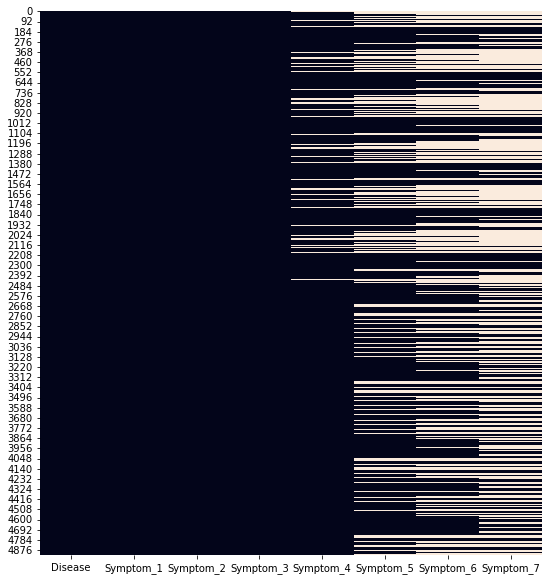

In [8]:
plt.figure(figsize=(9,10))
sns.heatmap(df.isnull(),cbar=False)

In [9]:
df.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7'],
      dtype='object')

In [10]:
df.describe().T

,count,unique,top,freq
Disease,4920,41,Fungal infection,120
Symptom_1,4920,34,vomiting,822
Symptom_2,4920,48,vomiting,870
Symptom_3,4920,54,fatigue,726
Symptom_4,4572,50,high_fever,378
Symptom_5,3714,38,headache,348
Symptom_6,2934,32,nausea,390
Symptom_7,2268,26,abdominal_pain,264


In [11]:
#Remove Hyphen
for col in df.columns:
    df[col]= df[col].str.replace('_',' ')

In [12]:
cols = df.columns

data = df[cols].values.flatten()

reshaped = pd.Series(data)
reshaped = reshaped.str.strip()
reshaped = reshaped.values.reshape(df.shape)

df = pd.DataFrame(reshaped, columns = df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN


**Replacing Null Values**

In [13]:
df.fillna(0,inplace=True)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,0,0,0
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,0,0,0,0
3,Fungal infection,itching,skin rash,dischromic patches,0,0,0,0
4,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0,0


In [14]:
df.isna().sum()

Disease      0
Symptom_1    0
Symptom_2    0
Symptom_3    0
Symptom_4    0
Symptom_5    0
Symptom_6    0
Symptom_7    0
dtype: int64

In [15]:
df['Disease'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

**Importing Symptoms Dataset**

In [16]:
df_s = pd.read_csv('../input/disease-symptom-description-dataset/Symptom-severity.csv')
df_s.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [17]:
# Remove Hyphen
df_s['Symptom']=df_s['Symptom'].str.replace('_',' ')

In [18]:
df_s['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

In [19]:
a= np.array(df_s['weight'])
a

array([1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2,
       6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4,
       6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4,
       4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4,
       3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3,
       3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3,
       5])

**Encoding Symptoms**

In [20]:
vals = df.values
symptoms = df_s['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df_s[df_s['Symptom'] == symptoms[i]]['weight'].values[0]
    
newdf = pd.DataFrame(vals, columns=cols)
newdf.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,1,3,4,dischromic patches,0,0,0
1,Fungal infection,3,4,dischromic patches,0,0,0,0
2,Fungal infection,1,4,dischromic patches,0,0,0,0
3,Fungal infection,1,3,dischromic patches,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0


**No Symptoms assiging zero**

In [21]:
newdf = newdf.replace('dischromic  patches', 0)
newdf = newdf.replace('spotting  urination',0)
newdf = newdf.replace('foul smell of urine',0)
newdf.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,1,3,4,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0
5,Fungal infection,3,4,0,0,0,0,0
6,Fungal infection,1,4,0,0,0,0,0
7,Fungal infection,1,3,0,0,0,0,0
8,Fungal infection,1,3,4,0,0,0,0
9,Fungal infection,1,3,4,0,0,0,0


**Selection of features for Training Purpose**

In [22]:
X = newdf.drop(['Disease'],axis=1)
y = newdf['Disease']

In [23]:
X.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,1,3,4,0,0,0,0
1,3,4,0,0,0,0,0
2,1,4,0,0,0,0,0
3,1,3,0,0,0,0,0
4,1,3,4,0,0,0,0


In [24]:
y.sample(6)

2103    Peptic ulcer diseae
4188                   AIDS
3837    Alcoholic hepatitis
1713               Diabetes
1784               Jaundice
3243          Drug Reaction
Name: Disease, dtype: object

**Splitting the dataset**

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score
from sklearn.svm import SVC

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=0)

In [27]:
clf_svc= SVC()
clf_svc.fit(X_train,y_train)

SVC()

In [28]:
predict = clf_svc.predict(X_test)

In [29]:
print('Accuracy Score: {}%'.format(round(accuracy_score(y_test,predict)*100,2)))

Accuracy Score: 95.43%


In [30]:
print(classification_report(y_test,predict))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       0.92      1.00      0.96        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       0.92      0.92      0.92        24
                                Allergy       0.83      1.00      0.91        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      0.96      0.98        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      0.88      0.93        24
                            Common Cold       1.00      0.88      0.93        24
                           

<AxesSubplot:>

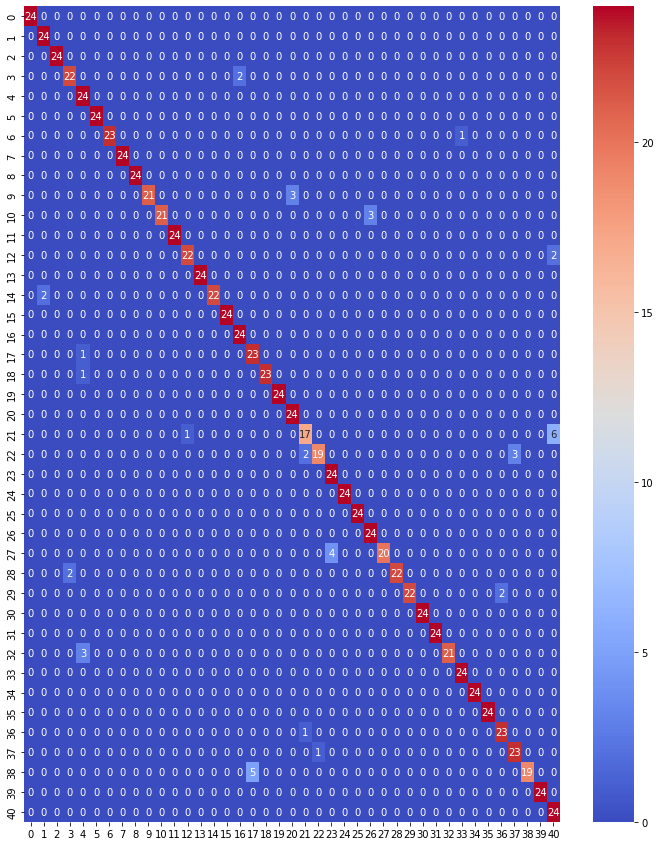

In [31]:
plt.figure(figsize=(12,15))
sns.heatmap(confusion_matrix(y_test,predict),annot=True,cbar=True,cmap='coolwarm')

**Random Forest Classifier**

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
clf_rfc = RandomForestClassifier(n_estimators=700,random_state=0,n_jobs=-1,verbose=4)
clf_rfc.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 700
building tree 2 of 700
building tree 3 of 700
building tree 4 of 700
building tree 5 of 700
building tree 6 of 700
building tree 7 of 700
building tree 8 of 700
building tree 9 of 700
building tree 10 of 700
building tree 11 of 700
building tree 12 of 700
building tree 13 of 700
building tree 14 of 700
building tree 15 of 700
building tree 16 of 700
building tree 17 of 700
building tree 18 of 700
building tree 19 of 700
building tree 20 of 700
building tree 21 of 700
building tree 22 of 700
building tree 23 of 700
building tree 24 of 700
building tree 25 of 700
building tree 26 of 700
building tree 27 of 700
building tree 28 of 700
building tree 29 of 700
building tree 30 of 700
building tree 31 of 700
building tree 32 of 700
building tree 33 of 700building tree 34 of 700

building tree 35 of 700
building tree 36 of 700
building tree 37 of 700
building tree 38 of 700
building tree 39 of 700
building tree 40 of 700
building tree 41 of 700
building tree 42 of 700
b

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.3s



building tree 123 of 700
building tree 124 of 700
building tree 125 of 700
building tree 126 of 700building tree 127 of 700

building tree 128 of 700
building tree 129 of 700
building tree 130 of 700
building tree 131 of 700
building tree 132 of 700building tree 133 of 700

building tree 134 of 700
building tree 135 of 700building tree 136 of 700

building tree 137 of 700
building tree 138 of 700
building tree 139 of 700building tree 140 of 700

building tree 141 of 700
building tree 142 of 700
building tree 143 of 700
building tree 144 of 700
building tree 145 of 700
building tree 146 of 700building tree 147 of 700

building tree 148 of 700
building tree 149 of 700
building tree 150 of 700
building tree 151 of 700
building tree 152 of 700
building tree 153 of 700
building tree 154 of 700
building tree 155 of 700
building tree 156 of 700
building tree 157 of 700
building tree 158 of 700
building tree 159 of 700
building tree 160 of 700
building tree 161 of 700
building tree 162 of 700

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    0.7s



building tree 239 of 700building tree 240 of 700

building tree 241 of 700
building tree 242 of 700
building tree 243 of 700
building tree 244 of 700
building tree 245 of 700building tree 246 of 700

building tree 247 of 700
building tree 248 of 700
building tree 249 of 700
building tree 250 of 700
building tree 251 of 700
building tree 252 of 700
building tree 253 of 700
building tree 254 of 700
building tree 255 of 700
building tree 256 of 700
building tree 257 of 700
building tree 258 of 700
building tree 259 of 700
building tree 260 of 700
building tree 261 of 700
building tree 262 of 700
building tree 263 of 700
building tree 264 of 700
building tree 265 of 700building tree 266 of 700

building tree 267 of 700
building tree 268 of 700
building tree 269 of 700
building tree 270 of 700
building tree 271 of 700
building tree 272 of 700
building tree 273 of 700
building tree 274 of 700
building tree 275 of 700
building tree 276 of 700
building tree 277 of 700
building tree 278 of 700

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    1.3s


building tree 420 of 700
building tree 421 of 700
building tree 422 of 700
building tree 423 of 700
building tree 424 of 700
building tree 425 of 700
building tree 426 of 700
building tree 427 of 700
building tree 428 of 700
building tree 429 of 700
building tree 430 of 700
building tree 431 of 700building tree 432 of 700

building tree 433 of 700building tree 434 of 700

building tree 435 of 700
building tree 436 of 700
building tree 437 of 700
building tree 438 of 700
building tree 439 of 700
building tree 440 of 700
building tree 441 of 700
building tree 442 of 700
building tree 443 of 700
building tree 444 of 700
building tree 445 of 700
building tree 446 of 700building tree 447 of 700

building tree 448 of 700
building tree 449 of 700
building tree 450 of 700
building tree 451 of 700
building tree 452 of 700
building tree 453 of 700
building tree 454 of 700
building tree 455 of 700
building tree 456 of 700
building tree 457 of 700
building tree 458 of 700building tree 459 of 700



[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed:    2.1s


building tree 611 of 700
building tree 612 of 700
building tree 613 of 700
building tree 614 of 700
building tree 615 of 700building tree 616 of 700

building tree 617 of 700
building tree 618 of 700
building tree 619 of 700
building tree 620 of 700
building tree 621 of 700
building tree 622 of 700
building tree 623 of 700
building tree 624 of 700
building tree 625 of 700
building tree 626 of 700
building tree 627 of 700
building tree 628 of 700
building tree 629 of 700
building tree 630 of 700
building tree 631 of 700
building tree 632 of 700
building tree 633 of 700
building tree 634 of 700building tree 635 of 700building tree 636 of 700


building tree 637 of 700
building tree 638 of 700
building tree 639 of 700
building tree 640 of 700
building tree 641 of 700
building tree 642 of 700
building tree 643 of 700
building tree 644 of 700
building tree 645 of 700
building tree 646 of 700
building tree 647 of 700
building tree 648 of 700
building tree 649 of 700
building tree 650 of 700


[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    2.4s finished


RandomForestClassifier(n_estimators=700, n_jobs=-1, random_state=0, verbose=4)

In [34]:
predict = clf_rfc.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 384 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 605 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.3s finished


In [35]:
print('Accuracy Score: {}%'.format(round(accuracy_score(y_test,predict)*100,2)))

Accuracy Score: 98.48%


In [36]:
print(classification_report(y_test,predict))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       0.86      1.00      0.92        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                            Common Cold       1.00      1.00      1.00        24
                           

<AxesSubplot:>

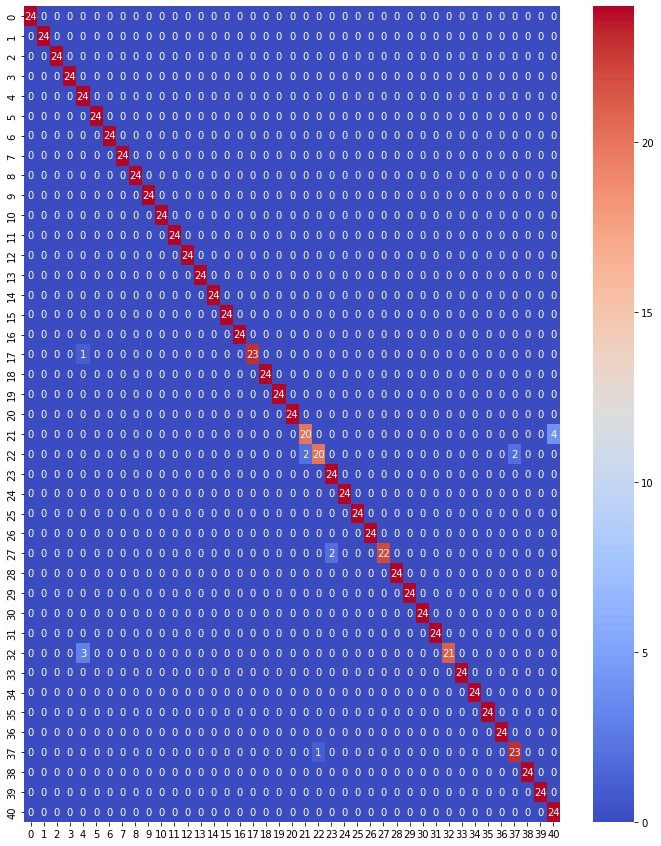

In [37]:
plt.figure(figsize=(12,15))
sns.heatmap(confusion_matrix(y_test,predict),annot=True,cbar=True,cmap='coolwarm')

**Function for prediction**

In [38]:
def predict(s1,s2,s3,s4='vomiting',s5='vomiting',s6='vomiting',s7='vomiting'):
    l = [s1,s2,s3,s4,s5,s6,s7]
    print(l)
    
    x= np.array(df_s['Symptom'])
    y= np.array(df_s['weight'])
    for i in range(len(l)):
        for j in range(len(x)):
            if l[i]==x[j]:
                l[i]=y[j]
    res = [l]
    pred = clf_rfc.predict(res)
    print(pred[0])

In [39]:
predict('itching' ,'skin rash', 'nodal skin eruptions')

['itching', 'skin rash', 'nodal skin eruptions', 'vomiting', 'vomiting', 'vomiting', 'vomiting']


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 384 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 605 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.1s finished


Chicken pox


**Save Model**

In [40]:
import pickle
pickle.dump(clf_rfc,open('RFC_symptoms.pkl','wb'))